# Obesity Levels Prediction





## Kelompok: 4
## Anggota

*   Alhanafil Fauzi
*   Anggoro Maliky
*   Erma Eliyani
*   Luthfiyana Hamidah Sherly Pradana
*   Shafa Amelia Putri

# Obesity Levels EDA || Prediction

## Dataset Information

* **This information has been recolected from the original dataset information by *FATEMEH MEHRPARVAR***
    * Gender: Feature, Categorical, "Gender"
    * Age : Feature, Continuous, "Age"
    * Height: Feature, Continuous
    * Weight: Feature Continuous
    * family_history_with_overweight: Feature, Binary, " Has a family member suffered or suffers from overweight? "

    * FAVC : Feature, Binary, " Do you eat high caloric food frequently? "
    * FCVC : Feature, Integer, " Do you usually eat vegetables in your meals? "
    * NCP : Feature, Continuous, " How many main meals do you have daily? "
    * CAEC : Feature, Categorical, " Do you eat any food between meals? "
    * SMOKE : Feature, Binary, " Do you smoke? "
    * CH2O: Feature, Continuous, " How much water do you drink daily? "
    * SCC: Feature, Binary, " Do you monitor the calories you eat daily? "
    * FAF: Feature, Continuous, " How often do you have physical activity? "
    * TUE : Feature, Integer, " How much time do you use technological devices such as cell phone, videogames, television, computer and others? "

    * CALC : Feature, Categorical, " How often do you drink alcohol? "
    * MTRANS : Feature, Categorical, " Which transportation do you usually use? "
    * NObeyesdad : Target, Categorical, "Obesity level"

# Set-Up

* **Load Libraries**

In [60]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np
import sklearn
from platform import python_version

# Ignore Warning
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.metrics import r2_score


* **Load Data**

In [61]:
from google.colab import drive
drive.mount('/gdrive')
!ln -s "/gdrive/My Drive/ML-Obesity" "/content/ML-Obesity"

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
ln: failed to create symbolic link '/content/ML-Obesity/ML-Obesity': File exists


In [62]:
df = pd.read_csv(r"ML-Obesity/ObesityDataSet.csv")

In [63]:
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

* **Data Cleaning**

In [65]:
# Creating DataFrame with Dtype, Unique, and Null information
df_info = pd.DataFrame(df.dtypes, columns=['Dtype'])
df_info['Unique'] = df.nunique().values
df_info['Null'] = df.isnull().sum().values
df_info

,Dtype,Unique,Null
Age,float64,1402,0
Gender,object,2,0
Height,float64,1574,0
Weight,float64,1525,0
CALC,object,4,0
FAVC,object,2,0
FCVC,float64,810,0
NCP,float64,635,0
SCC,object,2,0
SMOKE,object,2,0


* **Check if is there any duplicates**

In [66]:
duplicates = df.drop_duplicates(inplace=True)
print(duplicates)

None


* **This DataSet was already completly cleaned.**

# Data Analysis

## General Data Frame Information

* **Age, Height and Weight Box plots.**

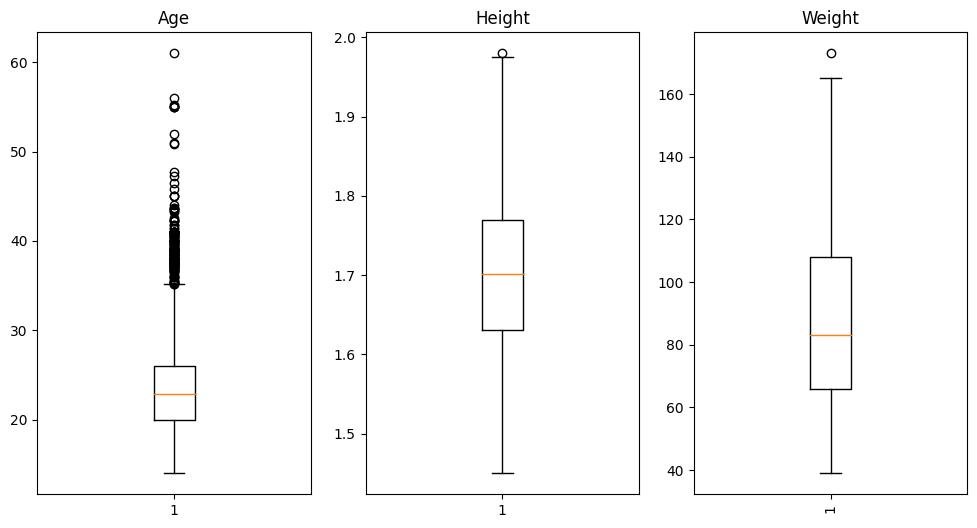

In [67]:
fig, axs = plt.subplots(1, 3, figsize=(12, 6))
pos = 0

for column in ['Age', 'Height', 'Weight']:
    axs[pos].boxplot(df[column])
    axs[pos].set_title(f'{column}')
    plt.xticks(rotation = 90)
    pos += 1
plt.show()

* **Value counts of 'CALC','FAVC', 'NObeyesdad' and 'MTRANS' columns.**

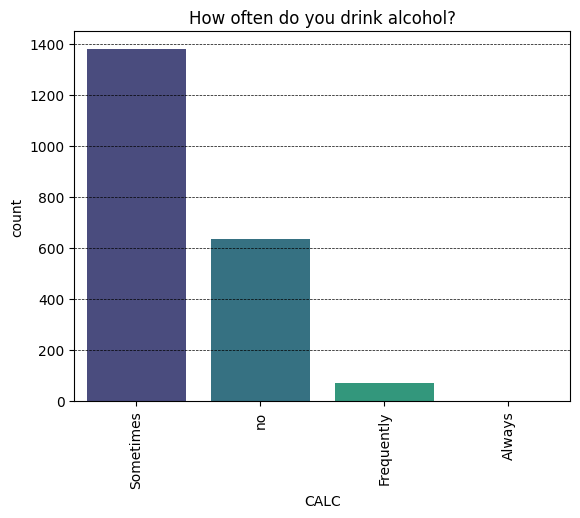

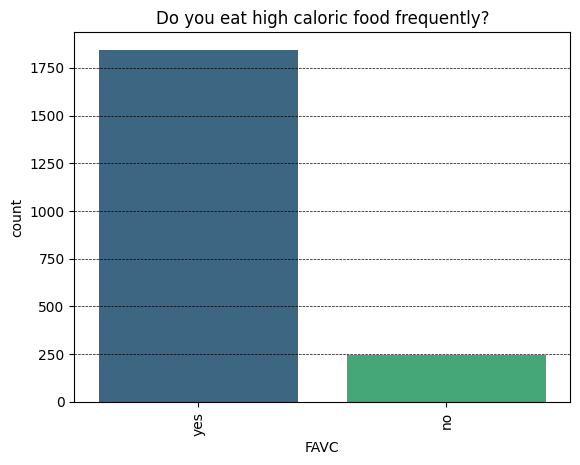

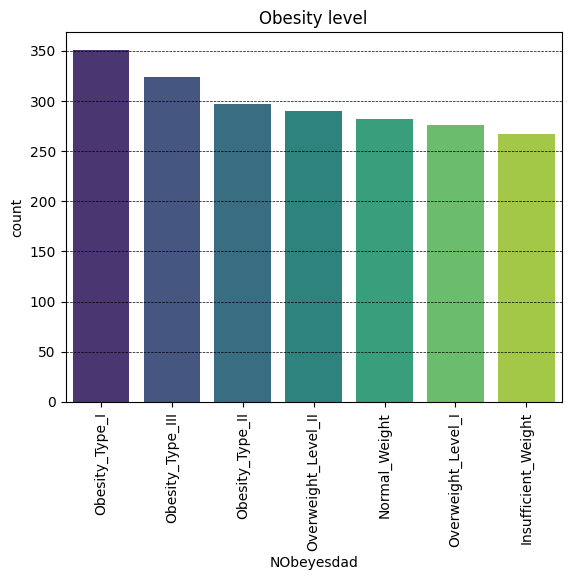

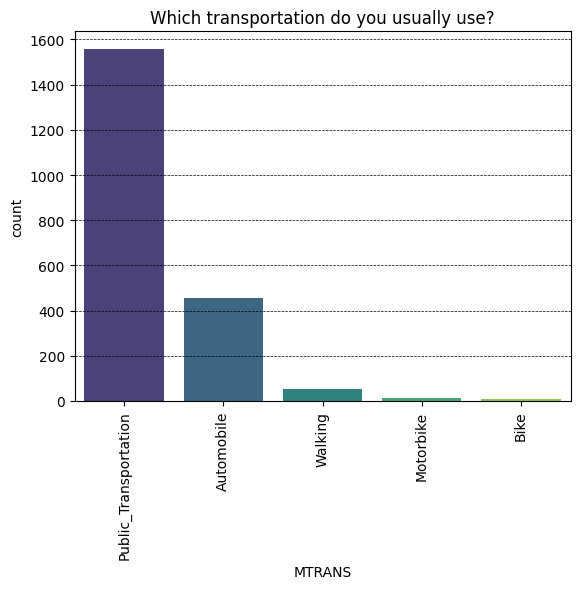

In [68]:
titles = ['How often do you drink alcohol?', 'Do you eat high caloric food frequently?', 'Obesity level', 'Which transportation do you usually use?']
count = 0
for column in ['CALC','FAVC', 'NObeyesdad', 'MTRANS']:
    values = df[column].value_counts().iloc[:10]
    sns.barplot( x= values.index, y = values, palette='viridis')
    plt.xticks(rotation = 90)
    plt.grid(color='black', linestyle='--', linewidth=0.5, which ='both', axis='y')
    plt.title(titles[count])
    count += 1
    plt.show()

* **Gender % in the DataFrame**

Text(0.5, 1.0, 'Gender % in the dataframe')

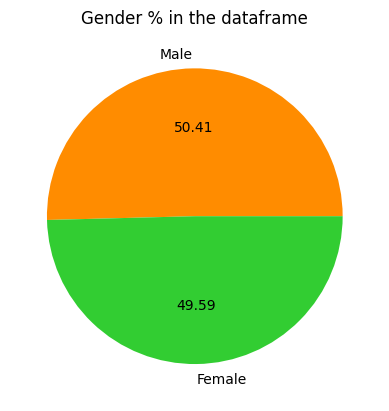

In [69]:
colors = ['darkorange', 'limegreen']

plt.pie(df['Gender'].value_counts(), labels= df['Gender'].value_counts().index, autopct=('%.2f'), colors = colors)
plt.title('Gender % in the dataframe')

## Specific Data Frame Information

* **Do the people that smoke also drink?**

Text(0.5, 1.0, 'Do the people that smoke also drink?')

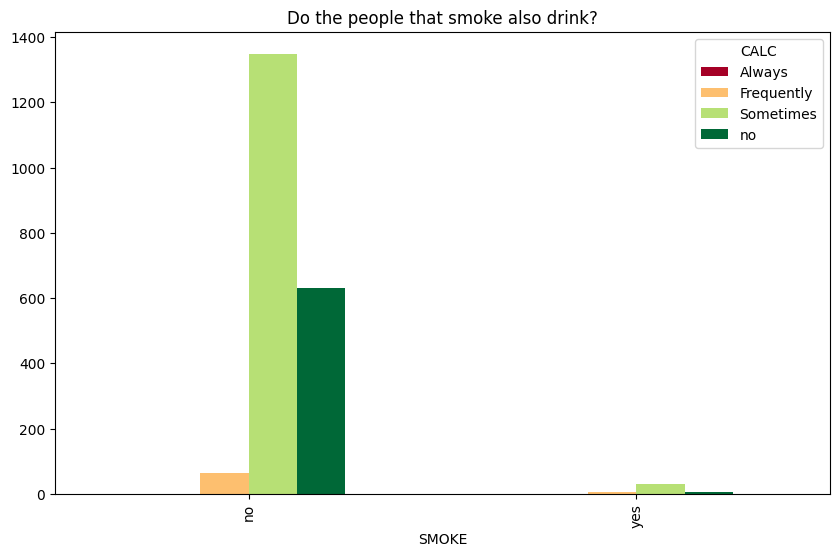

In [70]:
drugs = df.groupby('SMOKE')['CALC'].value_counts().unstack(fill_value=0)

drugs.plot(kind='bar', colormap='RdYlGn', figsize=(10,6))
plt.title('Do the people that smoke also drink?')

* **Gender, Height and Weight Comparation**

Text(0.5, 1.0, 'Gender Weight Mean Comparation')

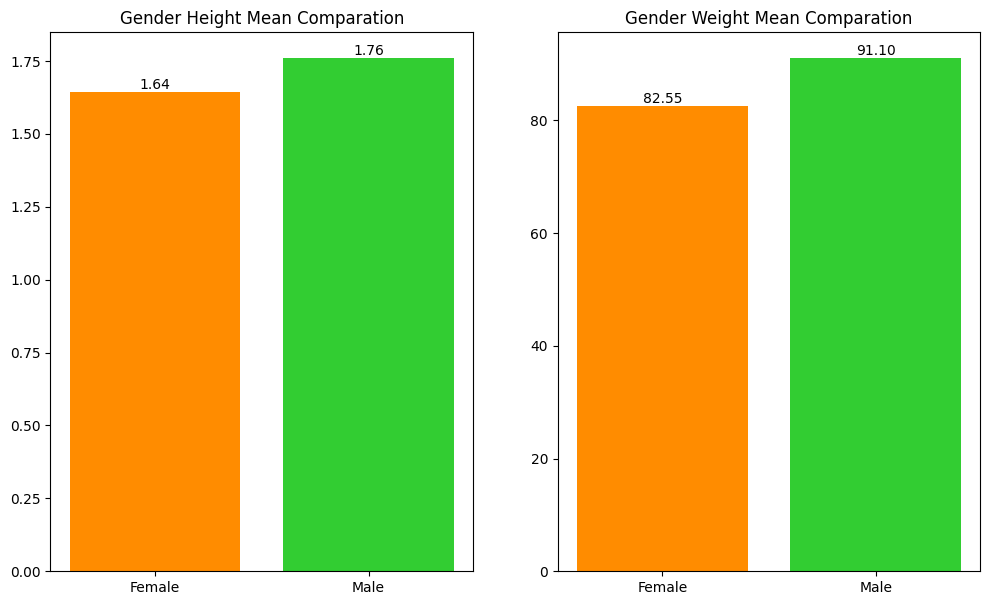

In [71]:
gender_height = df.groupby('Gender')['Height'].mean()
gender_weight = df.groupby('Gender')['Weight'].mean()

fig, ax = plt.subplots(1, 2, figsize=(12,7))

bar0 = ax[0].bar(x= gender_height.index, height = gender_height, color = colors)
ax[0].bar_label(bar0, fmt='%.2f')
ax[0].set_title('Gender Height Mean Comparation')

bar1 = ax[1].bar(x= gender_weight.index, height = gender_weight, color = colors)
ax[1].bar_label(bar1, fmt='%.2f')
ax[1].set_title('Gender Weight Mean Comparation')


* **Obesity level of people that eats caloric foods**

Text(0.5, 1.0, 'Obesity Level of people that eats high caloric food')

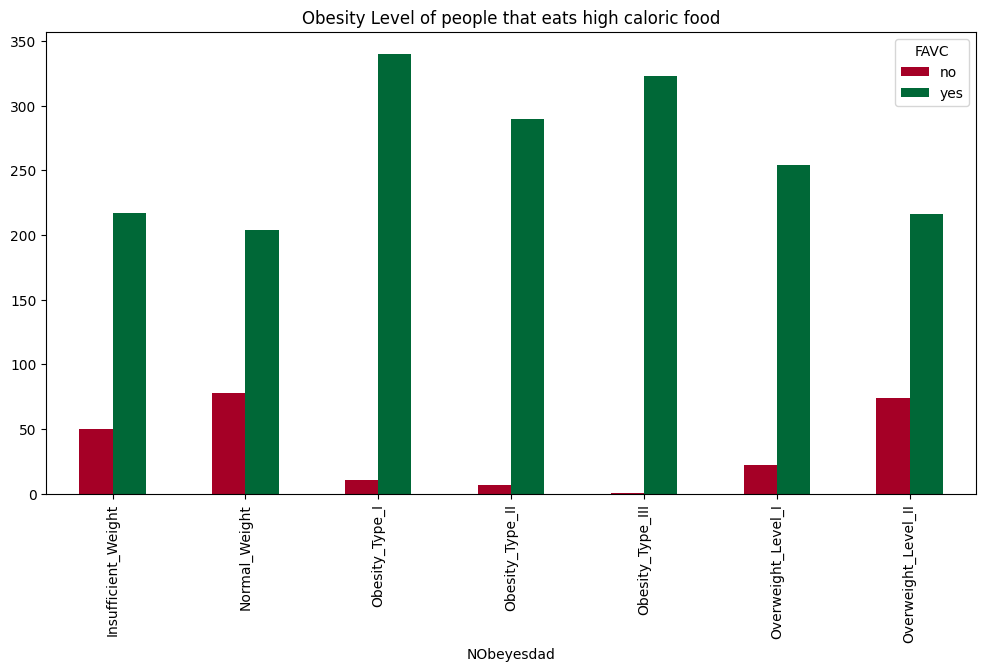

In [72]:
ob_caloric = df.groupby('NObeyesdad')['FAVC'].value_counts().unstack()

ob_caloric.plot(kind='bar', colormap='RdYlGn', figsize=(12, 6))
plt.title('Obesity Level of people that eats high caloric food')

* **Age vs Obesity**

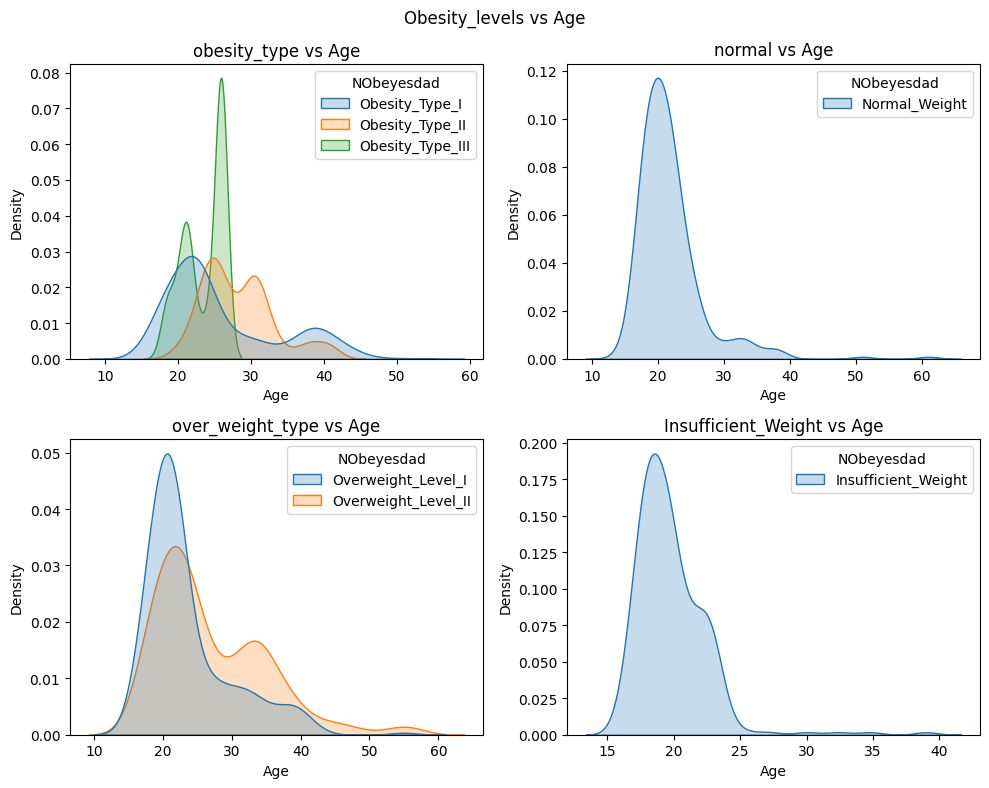

In [73]:
# Obesitas
df_ot = df[df["NObeyesdad"] == 'Obesity_Type_I' ]
df_ot2 = df[df["NObeyesdad"] == 'Obesity_Type_II']
df_ot3 = df[df["NObeyesdad"] == 'Obesity_Type_III']
df_ot_final = pd.concat([df_ot,df_ot2,df_ot3])      # data frame of Obesity_Type I, II, III
df_ot_final.reset_index(drop=True, inplace = True)
# Overweight
df_ow = df[df["NObeyesdad"]=='Overweight_Level_I']
df_ow2 = df[df["NObeyesdad"]=='Overweight_Level_II']
df_ow_final = pd.concat([df_ow,df_ow2])    # data frame of Over_weight_Type I, II
df_ow_final.reset_index(drop=True, inplace = True)
# Normal dan Insufficient
df_n = df[df["NObeyesdad"]=='Normal_Weight']
df_In = df[df["NObeyesdad"]=='Insufficient_Weight']

# Age vs Obesity
data_list = [df_ot_final, df_ow_final, df_n, df_In]
data_name =["obesity_type", "over_weight_type", "normal", "Insufficient_Weight" ]

fig,axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,8))

for i in range(2):

    sns.kdeplot(ax = axes[i,0],data=data_list[i], x="Age", hue="NObeyesdad", fill =True)
    axes[i, 0].set_title(f'{data_name[i]} vs Age')

    sns.kdeplot(ax = axes[i,1],data=data_list[i+2], x="Age", hue="NObeyesdad", fill =True)
    axes[i, 1].set_title(f'{data_name[i+2]} vs Age')



fig.suptitle('Obesity_levels vs Age')
plt.tight_layout()
plt.show()

In [74]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Prediction


## Preprocess Data


### Data to Numeric

In [75]:
df['Gender'].replace(['Male', 'Female'],[0,1],inplace=True)

# Columns with 'no', 'Sometimes', 'Frequently', 'Always'
for column in ['CALC', 'CAEC']:
    df[column].replace(['no', 'Sometimes', 'Frequently', 'Always'],[0,1,2,3],inplace=True)

# Binary columns
for column in ['FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight']:
    df[column].replace(['no', 'yes'],[0,1],inplace=True)

df['MTRANS'].replace(['Walking','Public_Transportation', 'Bike', 'Motorbike', 'Automobile'],[0,1,2,3,4],inplace=True)
df['NObeyesdad'].replace(['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'],[0,1,2,3,4,5,6],inplace=True)

### Correlation Map

<Axes: >

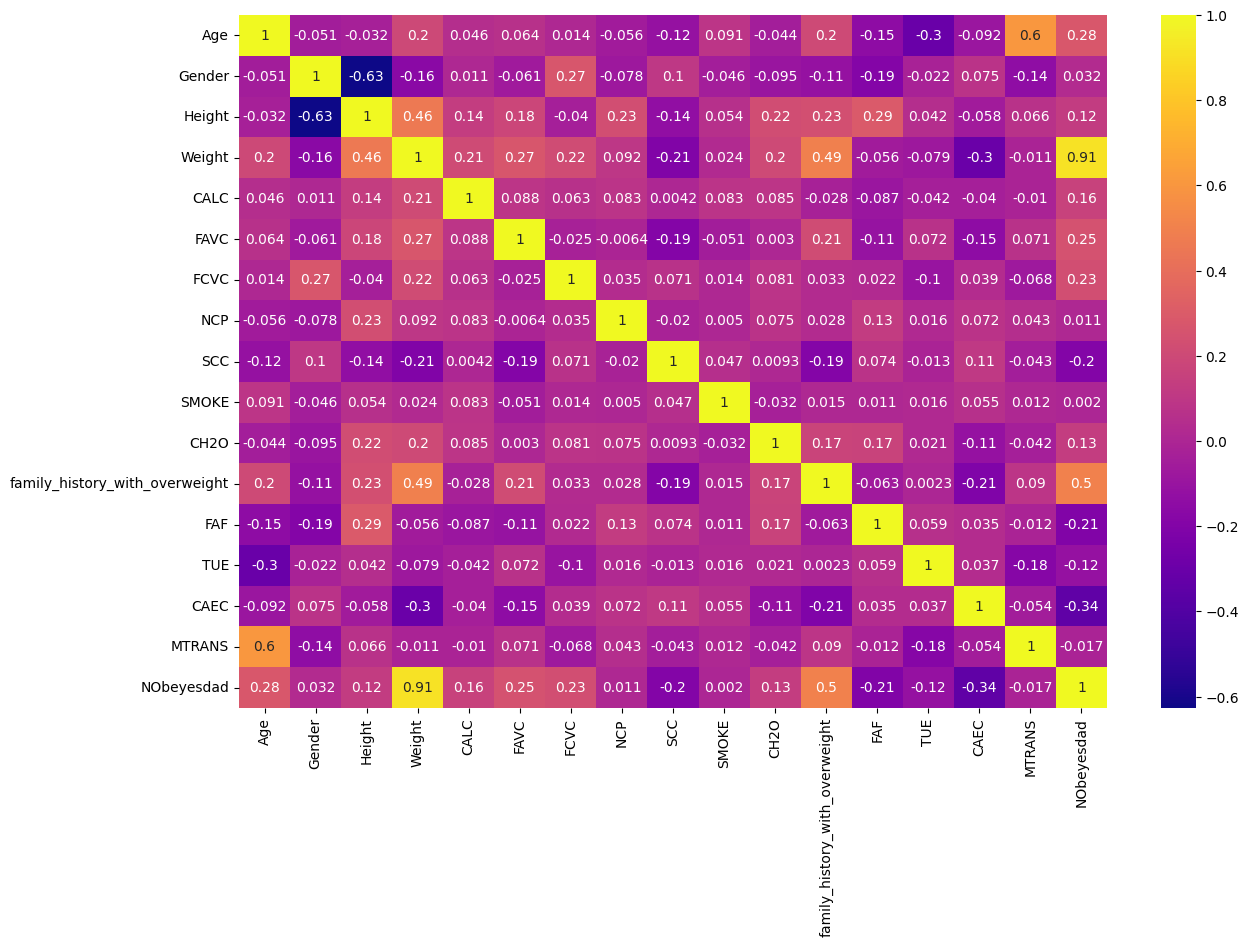

In [76]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(14,9))
sns.heatmap(corr, cmap= 'plasma', annot = True)

### Split Data

In [77]:
x = df.drop('NObeyesdad', axis='columns')
y = df['NObeyesdad']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.2, random_state=1)

* **Functions to calculate the accuracy of the models**

In [79]:
import numpy


models_acc = {}
def classification_acc(model, name):
    pred = model.predict(X_test)

    class_report = classification_report(y_test, pred)
    print("Classification Report:\n", class_report)

    sns.heatmap(confusion_matrix(y_test,pred), annot=True)
    plt.title(f'{name} confusion matrix')
    plt.show()
    accuracy = accuracy_score(y_test, pred)
    accuracy = numpy.float64(accuracy)
    print("Accuracy:", accuracy.round(3))

    models_acc[name] = accuracy.round(3)


def regression_acc(model, name):
    pred = model.predict(X_test)
    score = r2_score(y_test, pred).round(3)
    print('Accuracy:', score, '%')
    models_acc[name] = score

## ML Models

### Linear Regression


In [80]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

regression_acc(linear_reg, 'Linear Regression')

Accuracy: 0.946 %


### Decision Tree

#### Decision Tree Regressor

In [81]:
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train, y_train)

In [82]:
regression_acc(clf, 'Decision Tree Regressor')

Accuracy: 0.962 %


#### Decision Tree Classifier

In [83]:
dec_tree = tree.DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier()

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90       214
           1       0.82      0.74      0.78       229
           2       0.73      0.84      0.78       229
           3       0.84      0.75      0.79       238
           4       0.88      0.92      0.90       271
           5       0.97      0.95      0.96       240
           6       1.00      1.00      1.00       249

    accuracy                           0.88      1670
   macro avg       0.88      0.87      0.87      1670
weighted avg       0.88      0.88      0.88      1670



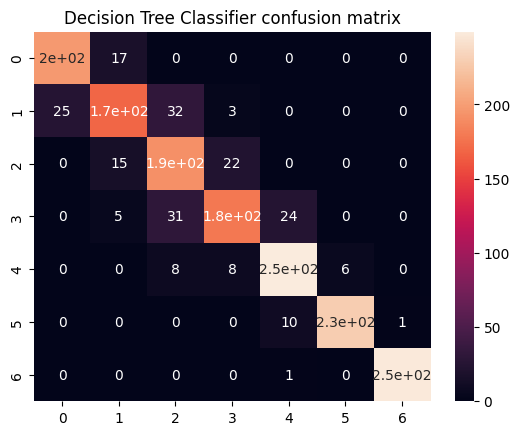

Accuracy: 0.875


In [84]:
classification_acc(dec_tree, 'Decision Tree Classifier')

### KNN models

#### KN Regressor

In [85]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(n_neighbors=4)

knr.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=4)

In [86]:
regression_acc(knr, 'KNeighbors Regressor')

Accuracy: 0.933 %


### Support Vector Machines


In [87]:
from sklearn import svm

svm_reg = svm.SVR()
svm_reg.fit(X_train, y_train)

SVR()

In [88]:
regression_acc(svm_reg, 'Support Vector Machines(Regression)')

Accuracy: 0.871 %


### Random Forest


In [89]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor()

In [90]:
from sklearn.metrics import mean_squared_error

pred = forest.predict(X_train)
MSE = mean_squared_error(y_train, pred)
RMSE = np.sqrt(MSE)
msg = "%s = %.2f" % ('Forest', round(RMSE, 2))
print('RMSE of', msg)


regression_acc(forest, 'Random Forest Regressor 1')

RMSE of Forest = 0.10
Accuracy: 0.983 %


#### Hypertuning parameters of Random Forest

In [91]:
param_grid = {'n_estimators': [10, 25], 'max_features': [5, 10],
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}

forest_gs = GridSearchCV(forest, param_grid, cv=5, scoring='neg_mean_squared_error').fit(X_train, y_train)
forest_gs.best_estimator_

RandomForestRegressor(bootstrap=False, max_depth=50, max_features=10,
                      n_estimators=25)

In [92]:
regression_acc(forest_gs.best_estimator_, 'Random Forest Regressor(Grid Search CV)')

pred = forest_gs.predict(X_train)
MSE = mean_squared_error(y_train, pred)
RMSE = np.sqrt(MSE)
msg = "%s = %.2f" % ('Forest Grid Search CV', round(RMSE, 2))
print('RMSE of', msg)

Accuracy: 0.977 %
RMSE of Forest Grid Search CV = 0.00


### Gradient Boosting

In [93]:
from sklearn.ensemble import GradientBoostingClassifier

In [94]:
model_GradientBoosting  = GradientBoostingClassifier(random_state=0)
model_GradientBoosting.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       214
           1       0.81      0.83      0.82       229
           2       0.84      0.78      0.81       229
           3       0.87      0.77      0.82       238
           4       0.85      0.97      0.90       271
           5       1.00      0.95      0.97       240
           6       1.00      1.00      1.00       249

    accuracy                           0.90      1670
   macro avg       0.90      0.90      0.90      1670
weighted avg       0.90      0.90      0.90      1670



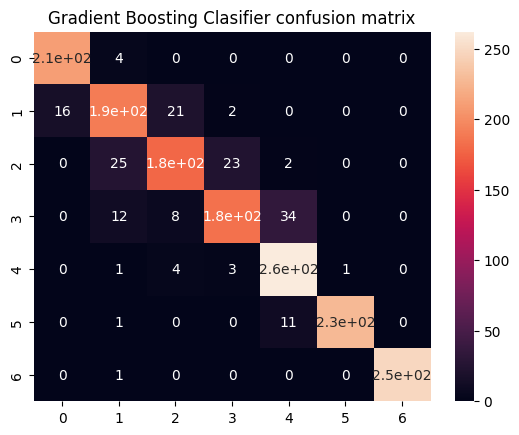

Accuracy: 0.899


In [95]:
classification_acc(model_GradientBoosting, 'Gradient Boosting Clasifier')

### LGBMClassifier

In [96]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from  xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import MaxAbsScaler,RobustScaler
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split,cross_val_score

In [97]:
model_lgbm  = LGBMClassifier()
model_lgbm.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000403 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 845
[LightGBM] [Info] Number of data points in the train set: 417, number of used features: 14
[LightGBM] [Info] Start training from score -2.062794
[LightGBM] [Info] Start training from score -2.062794
[LightGBM] [Info] Start training from score -2.182939
[LightGBM] [Info] Start training from score -2.081843
[LightGBM] [Info] Start training from score -1.651060
[LightGBM] [Info] Start training from score -1.990035
[LightGBM] [Info] Start training from score -1.715598
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

LGBMClassifier()

In [98]:
lgbm_predict = model_lgbm.predict(X_test)
accuracy_lgbm = accuracy_score(y_test, lgbm_predict)
print(f"Accuracy: {accuracy_lgbm}")

Accuracy: 0.9293413173652695


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       214
           1       0.86      0.88      0.87       229
           2       0.87      0.88      0.88       229
           3       0.92      0.85      0.88       238
           4       0.93      0.95      0.94       271
           5       0.99      0.97      0.98       240
           6       1.00      1.00      1.00       249

    accuracy                           0.93      1670
   macro avg       0.93      0.93      0.93      1670
weighted avg       0.93      0.93      0.93      1670



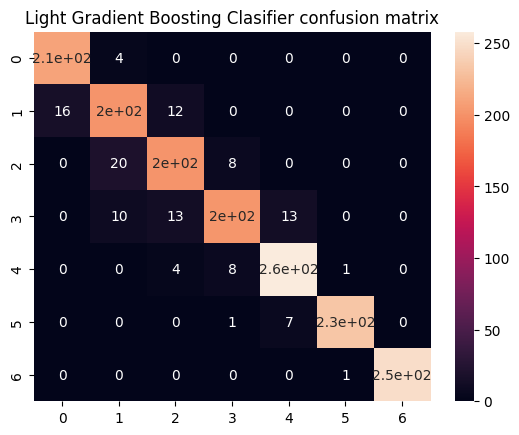

Accuracy: 0.929


In [99]:
classification_acc(model_lgbm, 'Light Gradient Boosting Clasifier')

### XGB Classifier

In [100]:
model_xgb = XGBClassifier(objective="multi:softmax",num_class = 7)
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=7,
              num_parallel_tree=None, ...)

In [101]:
xgb_predict = model_xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, xgb_predict)
print(f"Accuracy: {accuracy_xgb}")

Accuracy: 0.8994011976047904


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95       214
           1       0.79      0.85      0.82       229
           2       0.82      0.79      0.80       229
           3       0.91      0.76      0.83       238
           4       0.89      0.94      0.91       271
           5       0.97      0.98      0.97       240
           6       1.00      1.00      1.00       249

    accuracy                           0.90      1670
   macro avg       0.90      0.90      0.90      1670
weighted avg       0.90      0.90      0.90      1670



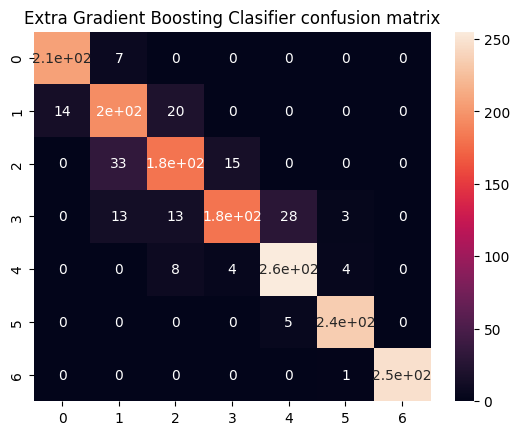

Accuracy: 0.899


In [102]:
classification_acc(model_xgb, 'Extra Gradient Boosting Clasifier')

### CatBoost CLassifier

In [103]:
!pip3 install catboost

In [104]:
from catboost import CatBoostClassifier

In [105]:
model_CatBoost = CatBoostClassifier(random_state=42, verbose=False)
model_CatBoost.fit(X_train, y_train)

In [106]:
CatBoost_predict = model_CatBoost.predict(X_test)
accuracy_CatBoost = accuracy_score(y_test, CatBoost_predict)
print(f"Accuracy: {accuracy_CatBoost}")

Accuracy: 0.937125748502994


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       214
           1       0.85      0.86      0.86       229
           2       0.89      0.85      0.87       229
           3       0.94      0.94      0.94       238
           4       0.97      0.96      0.96       271
           5       0.96      0.98      0.97       240
           6       1.00      1.00      1.00       249

    accuracy                           0.94      1670
   macro avg       0.94      0.94      0.94      1670
weighted avg       0.94      0.94      0.94      1670



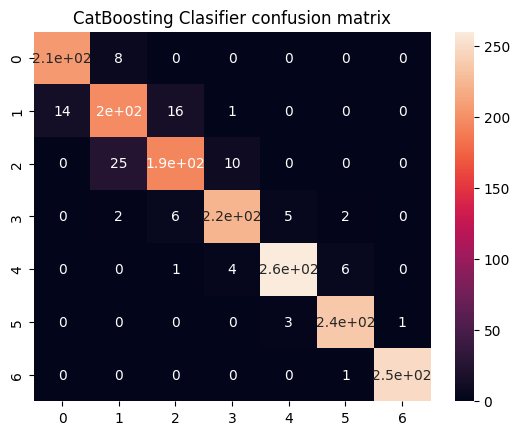

Accuracy: 0.937


In [107]:
classification_acc(model_CatBoost, 'CatBoosting Clasifier')

### ExtraTrees Classifier

In [108]:
from sklearn.ensemble import ExtraTreesClassifier

In [109]:
model_ExtraTrees = ExtraTreesClassifier(random_state=42)
model_ExtraTrees.fit(X_train, y_train)

ExtraTreesClassifier(random_state=42)

In [110]:
ExtraTrees_predict = model_ExtraTrees.predict(X_test)
accuracy_ExtraTrees = accuracy_score(y_test, ExtraTrees_predict)
print(f"Accuracy: {accuracy_ExtraTrees}")

Accuracy: 0.8826347305389222


Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92       214
           1       0.69      0.76      0.72       229
           2       0.83      0.70      0.76       229
           3       0.86      0.83      0.84       238
           4       0.92      0.95      0.93       271
           5       0.98      0.98      0.98       240
           6       1.00      0.99      0.99       249

    accuracy                           0.88      1670
   macro avg       0.88      0.88      0.88      1670
weighted avg       0.88      0.88      0.88      1670



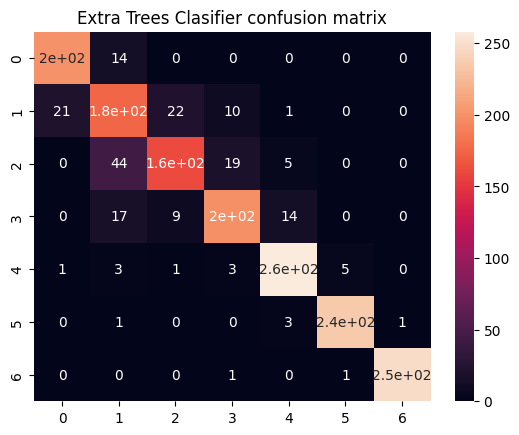

Accuracy: 0.883


In [111]:
classification_acc(model_ExtraTrees, 'Extra Trees Clasifier')

## Models Accuracy comparation

In [112]:
models_acc = models_acc
print(models_acc)

{'Linear Regression': 0.946, 'Decision Tree Regressor': 0.962, 'Decision Tree Classifier': 0.875, 'KNeighbors Regressor': 0.933, 'Support Vector Machines(Regression)': 0.871, 'Random Forest Regressor 1': 0.983, 'Random Forest Regressor(Grid Search CV)': 0.977, 'Gradient Boosting Clasifier': 0.899, 'Light Gradient Boosting Clasifier': 0.929, 'Extra Gradient Boosting Clasifier': 0.899, 'CatBoosting Clasifier': 0.937, 'Extra Trees Clasifier': 0.883}


[Text(0, 0, '0.983'),
 Text(0, 0, '0.977'),
 Text(0, 0, '0.962'),
 Text(0, 0, '0.946'),
 Text(0, 0, '0.937'),
 Text(0, 0, '0.933'),
 Text(0, 0, '0.929'),
 Text(0, 0, '0.899'),
 Text(0, 0, '0.899'),
 Text(0, 0, '0.883'),
 Text(0, 0, '0.875'),
 Text(0, 0, '0.871')]

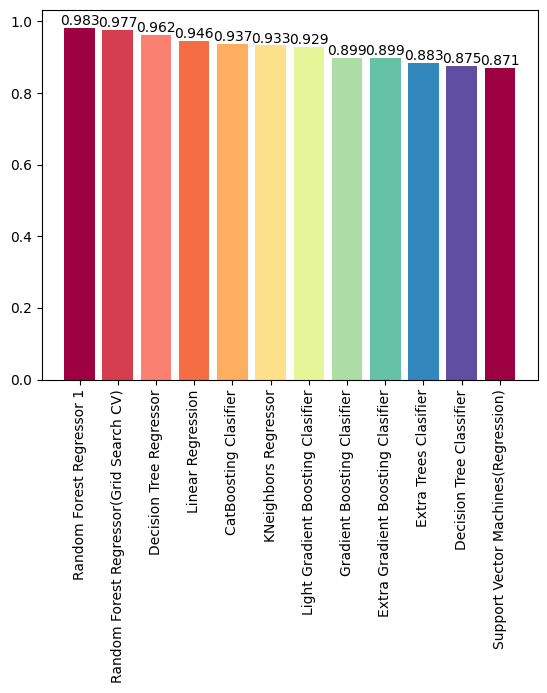

In [113]:
models_acc = pd.Series(models_acc)
models_acc = models_acc.sort_values(ascending=False)

colors = ['indigo', 'mediumblue', 'teal', 'turquoise', 'greenyellow', 'goldenrod']
colors2 = ['#9e0142', '#d53e4f', 'salmon', '#f46d43', '#fdae61', '#fee08b', '#e6f598', '#abdda4', '#66c2a5', '#3288bd', '#5e4fa2']

ax = plt.bar(models_acc.index, height = models_acc, color = colors2)
plt.xticks(rotation = 90)
plt.bar_label(ax, fontsize=10)

# Model Selection

Berdasarkan hasil evaluasi dari algoritma machine learning kami gunakan, ternyata beberapa adalah regressor yang merupakan algoritma berbeda (bisa digunakan namun kurang tepat untuk kasus ini). Sehingga kami hanya mengambil algoritma yang merupakan klasifikasi saja. Berikut hasil algoritma klasifikasi yang kami gunakan.

[Text(0, 0, '0.88'),
 Text(0, 0, '0.899'),
 Text(0, 0, '0.929'),
 Text(0, 0, '0.899'),
 Text(0, 0, '0.937'),
 Text(0, 0, '0.883')]

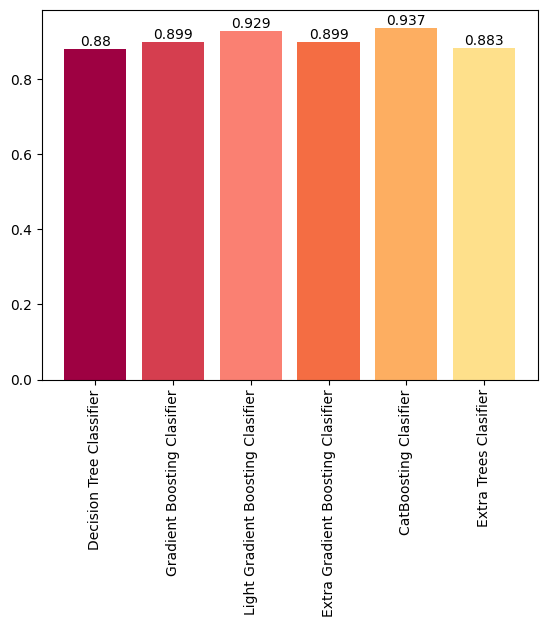

In [ ]:
index = ['Decision Tree Classifier', 'Gradient Boosting Clasifier', 'Light Gradient Boosting Clasifier', 'Extra Gradient Boosting Clasifier', 'CatBoosting Clasifier', 'Extra Trees Clasifier' ]
height = [0.88, 0.899, 0.929, 0.899, 0.937, 0.883]

colors3 = ['#9e0142', '#d53e4f', 'salmon', '#f46d43', '#fdae61', '#fee08b']

ax = plt.bar(index, height, color = colors3)
plt.xticks(rotation = 90)
plt.bar_label(ax, fontsize=10)


Berdasarkan hasil evaluasi yang telah dilakukan dari beberapa algoritma diatas, kami memutuskan untuk mengunakan algoritma model Catboosting Clasifier dikarenakan memiliki nilai akurasi yang paling baik.

In [ ]:
X = np.array([[21, 1, 1.68, 60, 0, 0, 2, 3, 0, 0, 2, 0, 3, 1, 1, 1]])

In [ ]:
y_pred = model_CatBoost.predict(X)
#print(int(y_pred))
if int(y_pred) == 0:
  print("Issufficient Weight")
if int(y_pred) == 1:
  print("Normal Weight")
if int(y_pred) == 2:
  print("OverWeight Level 1")
if int(y_pred) == 3:
  print("OverWeight Level 2")
if int(y_pred) == 4:
  print("Obesity Level 1")
if int(y_pred) == 5:
  print("Obesity Level 2")
if int(y_pred) == 6:
  print("Obesity Level 3")

Normal Weight


# Pickle

In [115]:
import pickle
# Save model to file
with open('obesity_classifier.pkl', 'wb') as file:
    pickle.dump(model_CatBoost, file)